We would like to predict customer who would make a purchase from the online store. Let's dive into the data.

In [60]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
%matplotlib inline

import numpy as np
from numpy.linalg import norm
import pandas as pd 

import seaborn as sns
import missingno

In [61]:
df = pd.read_csv ('.\online_jewellery_shop_train.csv')

In [77]:
df.keys()

Index(['ID', 'Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'avg_adm_dur', 'avg_inf_dur', 'avg_prod_dur'],
      dtype='object')

In [62]:
df.head()

ID  Administrative  Administrative_Duration  Informational  \
0  3935             1.0                50.333333            0.0   
1  7866             6.0               299.000000            1.0   
2  3727             0.0                 0.000000            0.0   
3  4454             0.0                 0.000000            0.0   
4  6186             0.0                 0.000000            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0            21.0               586.189286   
1                    41.0            36.0               696.402778   
2                     0.0            19.0               620.033333   
3                     0.0             4.0                46.250000   
4                     0.0            24.0               671.088653   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     0.000000   0.005556         0.0         0.6   May                 1   
1     0.000000   0.002632         0.0         0.0   May                 2   
2     0.000000   0.007895         0.0         0.0   Feb                 1   
3     0.050000   0.066667         0.0         0.0   Nov                 3   
4     0.026667   0.036566         0.0         0.0   Nov                 1   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            2  Returning_Visitor        0        0  
1        2       2            4        New_Visitor        1        0  
2        1       4            2  Returning_Visitor        0        0  
3        2       6           13  Returning_Visitor        0        0  
4        1       3            2  Returning_Visitor        0        0

In [63]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# df['Month'] = le.fit_transform(df['Month'])
# df['VisitorType'] = le.fit_transform(df['VisitorType'])

In [64]:
df['Administrative_Duration']/df['Administrative'][df['Administrative'] !=0]

0       50.333333
1       49.833333
2             NaN
3             NaN
4             NaN
          ...    
8625          NaN
8626    19.824306
8627          NaN
8628     8.000000
8629          NaN
Length: 8630, dtype: float64

In [78]:
#df = df.fillna(0)

#feature engineering
df['avg_adm_dur'] = df['Administrative_Duration']/df['Administrative'][df['Administrative'] !=0]
df['avg_inf_dur'] = df['Informational_Duration']/df['Informational'][df['Informational'] !=0]
df['avg_prod_dur'] = df['ProductRelated_Duration']/df['ProductRelated'][df['ProductRelated'] !=0]

#change type
df['VisitorType'] = df['VisitorType'].astype('category')
df['Month'] = df['Month'].astype('category')

#is this necessary?
df['Revenue'] = df['Revenue'].astype('category')
df['Weekend'] = df['Weekend'].astype('category')
df['OperatingSystems'] = df['OperatingSystems'].astype('category')
df['Browser'] = df['Browser'].astype('category')
df['Region'] = df['Region'].astype('category')
df['TrafficType'] = df['TrafficType'].astype('category')


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8630 entries, 0 to 8629
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       8630 non-null   int64   
 1   Administrative           8622 non-null   float64 
 2   Administrative_Duration  8622 non-null   float64 
 3   Informational            8622 non-null   float64 
 4   Informational_Duration   8622 non-null   float64 
 5   ProductRelated           8622 non-null   float64 
 6   ProductRelated_Duration  8622 non-null   float64 
 7   BounceRates              8622 non-null   float64 
 8   ExitRates                8622 non-null   float64 
 9   PageValues               8630 non-null   float64 
 10  SpecialDay               8630 non-null   float64 
 11  Month                    8630 non-null   category
 12  OperatingSystems         8630 non-null   category
 13  Browser                  8630 non-null   category
 14  Region  

In [67]:
df.describe()

ID  Administrative  Administrative_Duration  Informational  \
count   8630.000000     8622.000000              8622.000000    8622.000000   
mean    8015.500000        2.343192                83.405240       0.490373   
std     2491.410745        3.315094               182.985925       1.258803   
min     3701.000000        0.000000                -1.000000       0.000000   
25%     5858.250000        0.000000                 0.000000       0.000000   
50%     8015.500000        1.000000                 9.000000       0.000000   
75%    10172.750000        4.000000                95.575000       0.000000   
max    12330.000000       26.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count             8622.000000     8622.000000              8622.000000   
mean                33.159578       31.872419              1192.184366   
std                138.432097       44.605549              1944.264408   
min                 -1.000000        0.000000                -1.000000   
25%                  0.000000        7.000000               192.462500   
50%                  0.000000       18.000000               606.283333   
75%                  0.000000       37.000000              1450.841355   
max               2549.375000      705.000000             63973.522230   

       BounceRates    ExitRates   PageValues   SpecialDay  TrafficType  \
count  8622.000000  8622.000000  8630.000000  8630.000000  8630.000000   
mean      0.021920     0.042457     5.699051     0.061738     4.115064   
std       0.047651     0.047784    17.769196     0.199358     4.069918   
min       0.000000     0.000000     0.000000     0.000000     1.000000   
25%       0.000000     0.014286     0.000000     0.000000     2.000000   
50%       0.003279     0.025000     0.000000     0.000000     2.000000   
75%       0.017497     0.050000     0.000000     0.000000     4.000000   
max       0.200000     0.200000   360.953384     1.000000    20.000000   

       avg_adm_dur  avg_inf_dur  avg_prod_dur  
count  4628.000000  1784.000000   8601.000000  
mean     38.627325    68.615590     38.031684  
std      59.425551   129.661774     46.825604  
min      -1.000000     0.000000     -1.000000  
25%      13.600000    11.575000     17.954545  
50%      23.195193    30.916667     28.958532  
75%      43.000000    71.289062     45.113636  
max    1566.600000  1778.000000   1411.000000


Preview of data with null values:


ID  Administrative  Administrative_Duration  Informational  \
0  3935             1.0                50.333333            0.0   
2  3727             0.0                 0.000000            0.0   
3  4454             0.0                 0.000000            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0            21.0               586.189286   
2                     0.0            19.0               620.033333   
3                     0.0             4.0                46.250000   

   BounceRates  ExitRates  PageValues  ...  OperatingSystems Browser Region  \
0         0.00   0.005556         0.0  ...                 1       1      1   
2         0.00   0.007895         0.0  ...                 1       1      4   
3         0.05   0.066667         0.0  ...                 3       2      6   

  TrafficType        VisitorType  Weekend Revenue avg_adm_dur avg_inf_dur  \
0           2  Returning_Visitor        0       0   50.333333         NaN   
2           2  Returning_Visitor        0       0         NaN         NaN   
3          13  Returning_Visitor        0       0         NaN         NaN   

   avg_prod_dur  
0     27.913776  
2     32.633333  
3     11.562500  

[3 rows x 22 columns]

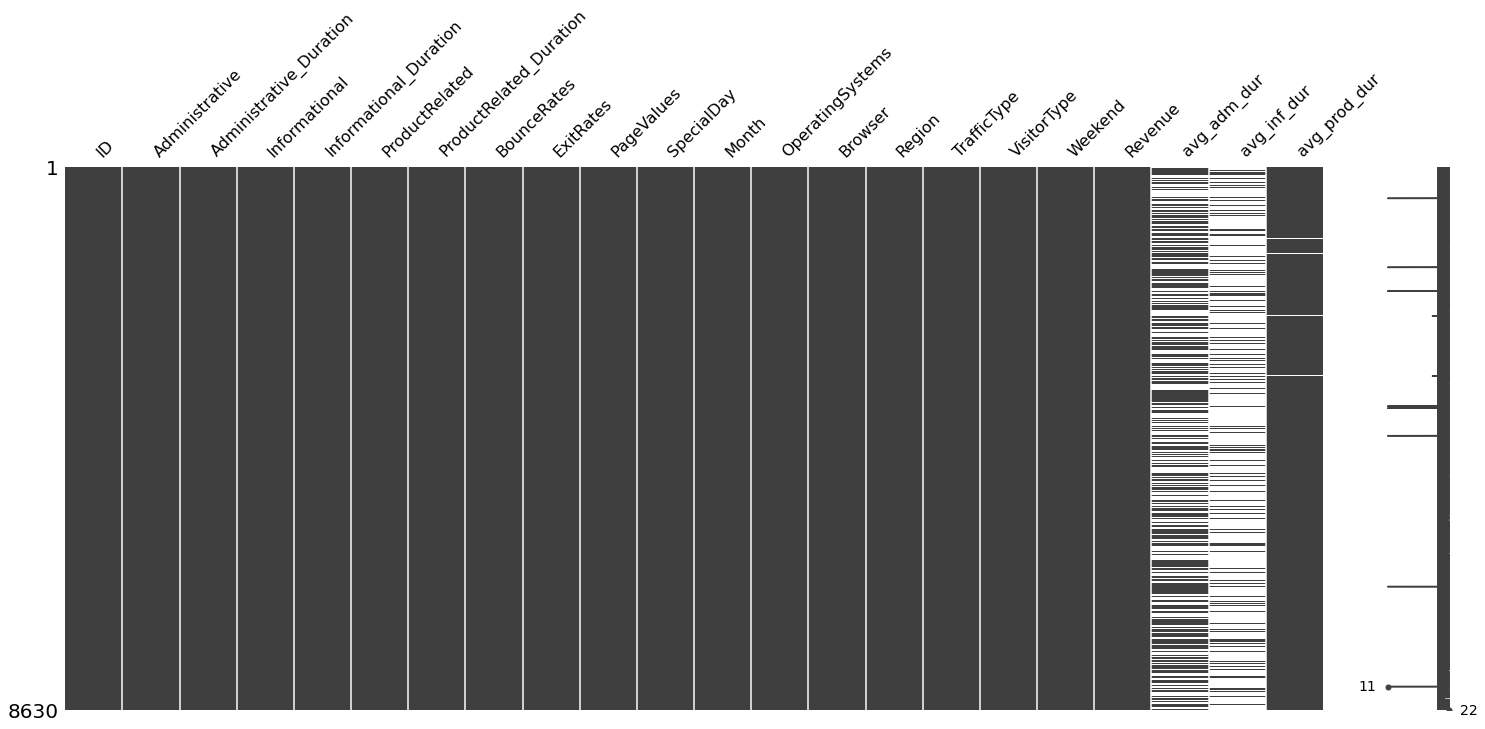

In [68]:
# generate preview of entries with null values
if len(df[df.isnull().any(axis=1)] != 0):
    print("\nPreview of data with null values:")
    display(df[df.isnull().any(axis=1)].head(3))
    missingno.matrix(df)
    plt.show()


From the missing value plots, 2 of the 3 engineered feature contains a lot of missing values. Other features have little missing values.

Assumptions on missing values: they are likely missing because product has no page associated to it. Consider the possibility of setting it to 0 for calculation convenience

In [69]:
# generate count statistics of duplicate entries
if len(df[df.duplicated()]) > 0:
    print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
    display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("\nNo duplicated entries found")


No duplicated entries found


In [70]:
def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")
    
    
def categorical_eda(df, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()


To check: 
Unique count of non-numeric data

Month               10
OperatingSystems     8
Browser             12
Region               9
VisitorType          3
Weekend              2
Revenue              2
dtype: int64
Top 5 unique values of Month
  Month  Count
0   May   2339
1   Nov   2109
2   Mar   1336
3   Dec   1215
4   Oct    377
 
Top 5 unique values of OperatingSystems
  OperatingSystems  Count
0                2   4597
1                1   1823
2                3   1794
3                4    339
4                8     57
 
Top 5 unique values of Browser
  Browser  Count
0       2   5611
1       1   1723
2       4    482
3       5    319
4      10    115
 
Top 5 unique values of Region
  Region  Count
0      1   3347
1      3   1675
2      4    806
3      2    800
4      7    562
 
Top 5 unique values of VisitorType
         VisitorType  Count
0  Returning_Visitor   7371
1        New_Visitor   1201
2              Other     58
 
Top 5 unique values of Weekend
  Weekend  Count
0

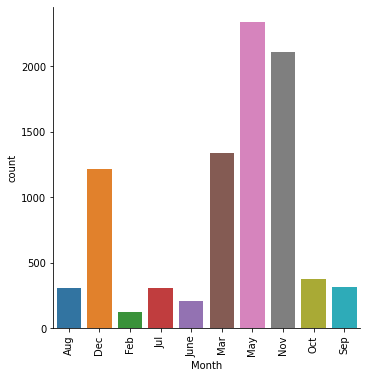

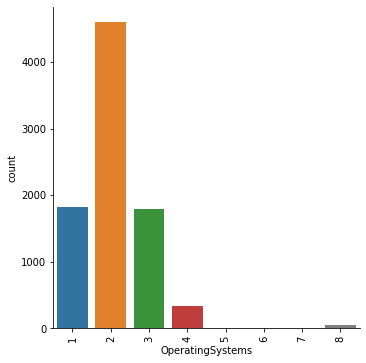

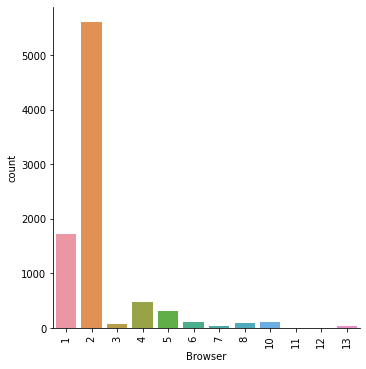

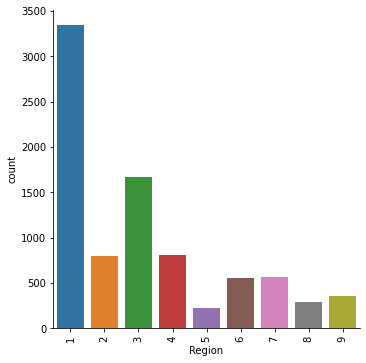

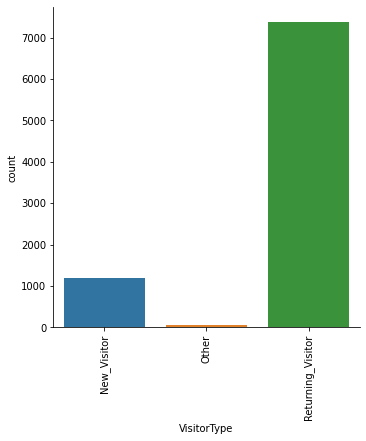

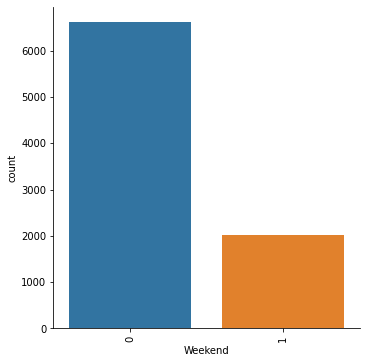

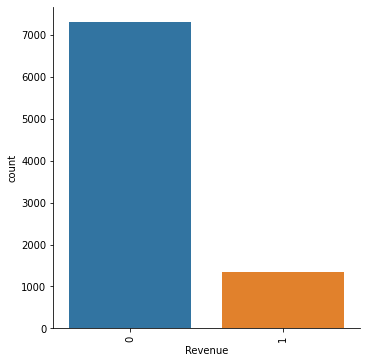

In [71]:
categorical_eda(df)

observations:

1) Dataset is imbalanced: y (Revenue) datapoints in class 0 and class 1 is not 50/50

2) seasonality: there's more site visits in may and in november

3) Visitor Type: there is significantly more returning visitors. It will be interesting to see if returning visitor are more likely to purchase. (In marketing, it is said that it is more costly to attract new customers than to retain old customers. verify this claim.)

4) more visits during weekdays: counterintuitive. do people tend to shop during work hours?

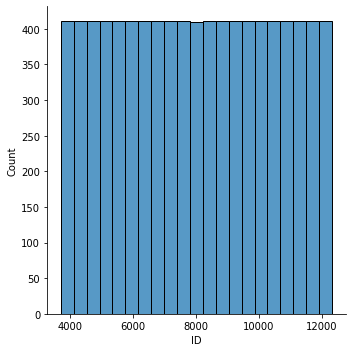

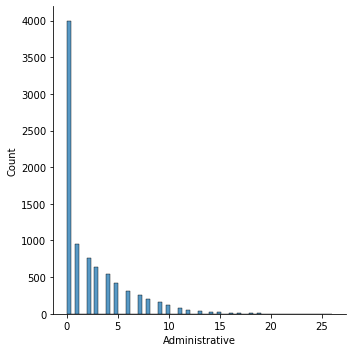

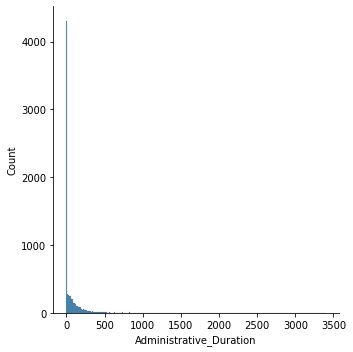

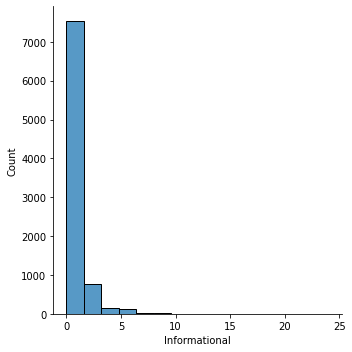

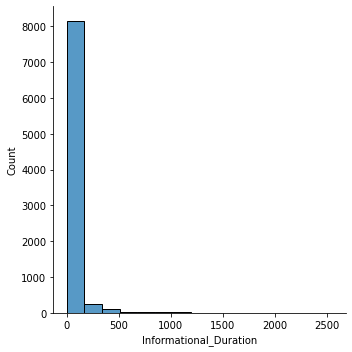

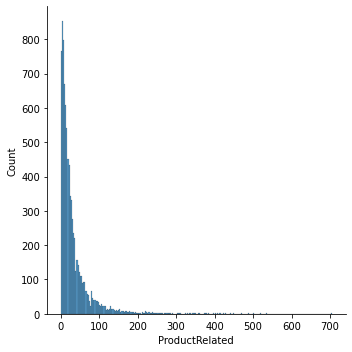

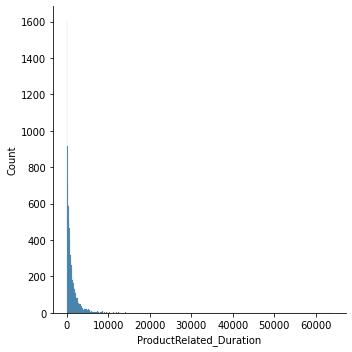

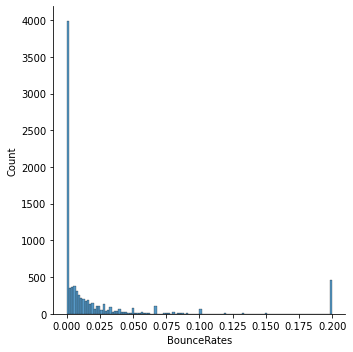

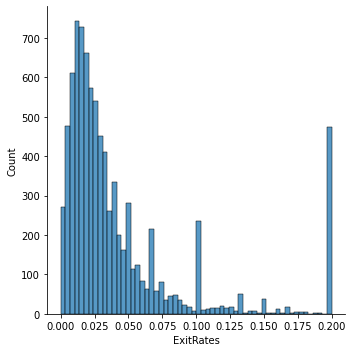

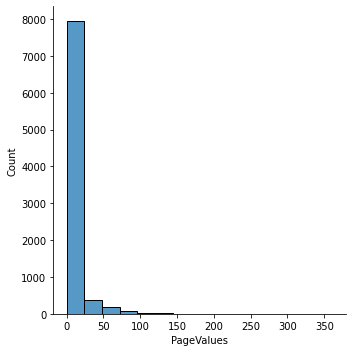

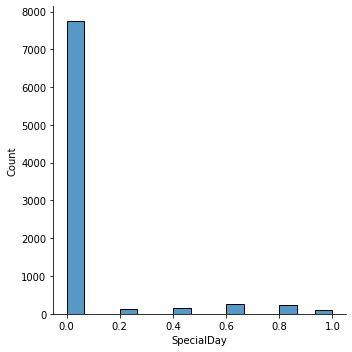

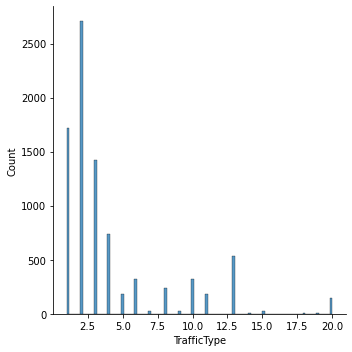

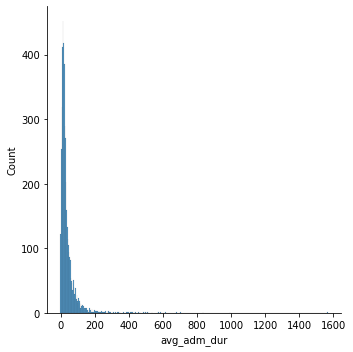

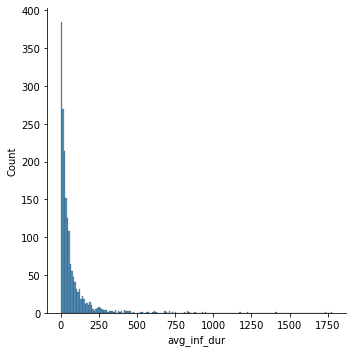

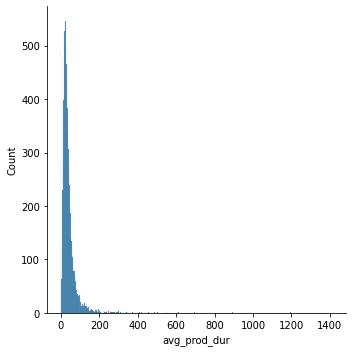

In [76]:
for col_num in df.select_dtypes(include=np.number).columns:
    sns.displot(df, x=col_num)

observations:

1) most of numerical features are positively skewed. features will have to be normalized 

2) avg_prod_dur and exit rates are more normal, we can consider excluding it when normalizing features

3) distribution of a page and page duration is very similar (eg informational and informational_duration). how are they related? 

4) most product don't have an admin/info page

In [81]:
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    # print("\nTo check: \nDistribution of numeric data")
    # display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    # if len(df.select_dtypes(include='category').columns) > 0:
    #     for col_num in df.select_dtypes(include=np.number).columns:
    #         for col in df.select_dtypes(include='category').columns:
    #             fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
    #             fig.set_xticklabels(rotation=90)
    #             plt.show()
    
    # # Plot the pairwise joint distributions
    # print("\nTo check pairwise joint distribution of numeric data")
    # if hue==None:
    #     sns.pairplot(df.select_dtypes(include=np.number))
    # else:
    #     sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    # plt.show()

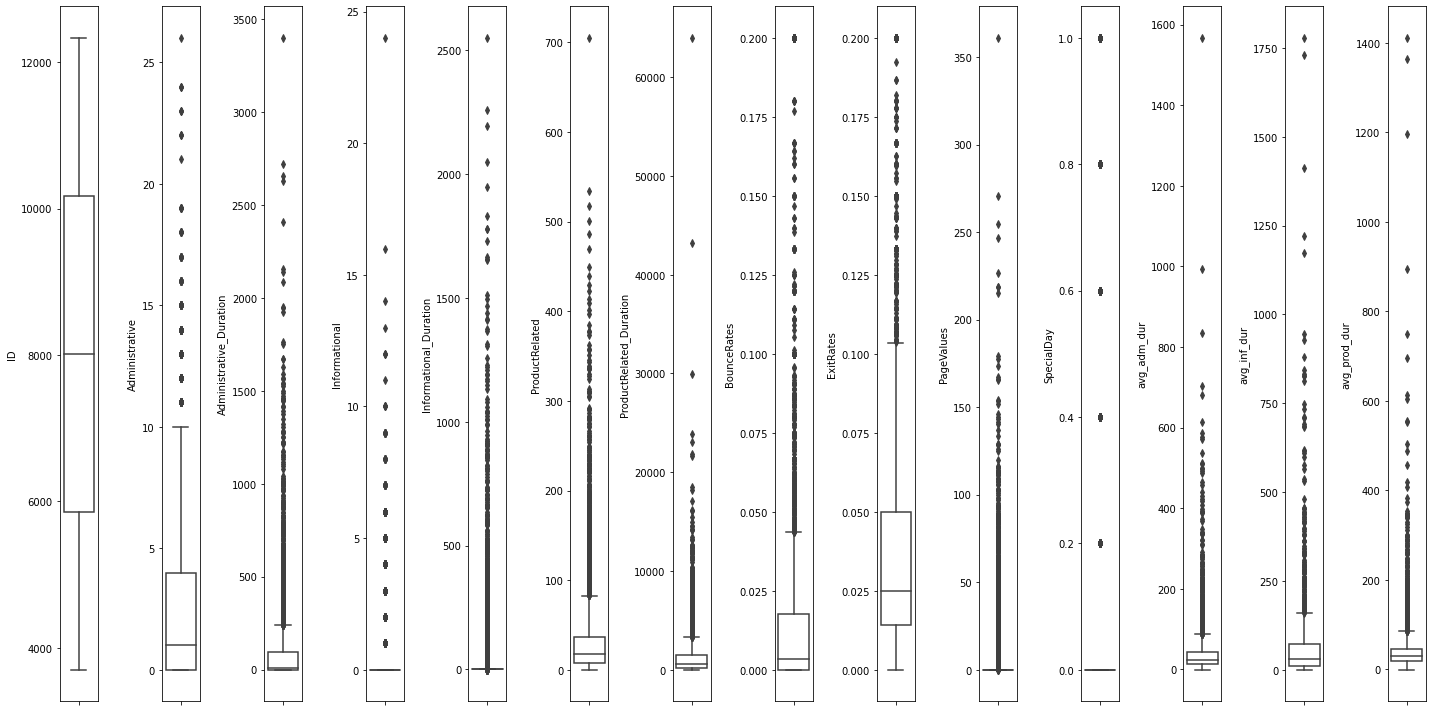

In [82]:
numeric_eda(df)

Most categories have extreme outliers. Dealing with them will be an essential task before building models

In [ ]:
I want to see how variables affect customer purchase (i.e. revenue)

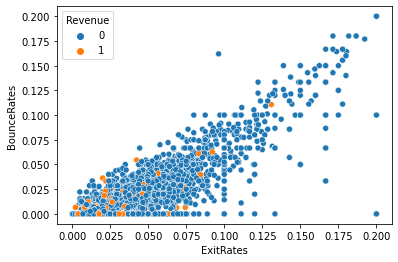

In [87]:
sns.scatterplot(df['ExitRates'], df['BounceRates'], hue=df['Revenue'])
plt.show()

low bounce rate and exit rate -> more likely to purchase???

<AxesSubplot:>

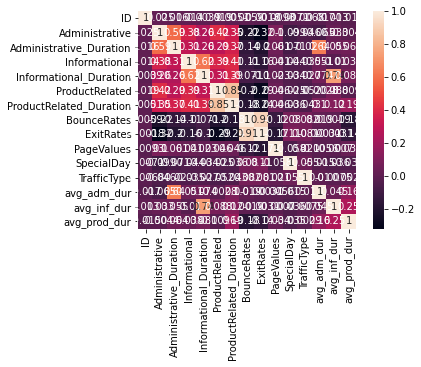

In [52]:
sns.heatmap(df.corr(), square=True, annot=True)

page and page duration are highly correlated. bounce rate and exit rates are highly correlated.

In [106]:
df.pivot_table(index='VisitorType', columns='Revenue', values =['avg_prod_dur','avg_adm_dur', 'avg_inf_dur']) #                   aggfunc='size', fill_value=0)

avg_adm_dur            avg_inf_dur             avg_prod_dur  \
Revenue                     0          1           0           1            0   
VisitorType                                                                     
New_Visitor         39.424655  39.594931   52.843322   70.167141    33.876501   
Other               28.528832  39.035714   19.547917  105.125000    42.035888   
Returning_Visitor   38.444244  38.638309   68.669997   74.965266    37.783786   

                              
Revenue                    1  
VisitorType                   
New_Visitor        42.111584  
Other              42.717528  
Returning_Visitor  41.820471

It is interesting to see that other visitor who makes a purchase spends a significant amount of time on the informational page. It seems like in general customers who make a purchase spends more time on informational page.